In [3]:
import math
import numpy as np
import scipy as sp
from scipy import signal
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [7]:
file = scipy.io.wavfile.read('signal.wav')

In [8]:
# Sample rate is the number of samples per second
print("The sample rate is the following: ", file[0])

The sample rate is the following:  16000


In [9]:
print("The number of samples in the recording is: ", len(file[1]))

The number of samples in the recording is:  18091


In [10]:
print("Therefore, it corresponds to the following seconds:", len(file[1])/file[0])

Therefore, it corresponds to the following seconds: 1.1306875


In [11]:
# Mean subtraction:
data = np.array(file[1])
mean = np.mean(data)
data_mean = data - mean

In [12]:
# Pre-emphasis:
data_w_pre = data_mean
b = 0.97
for i in range(1, len(data)):
    data_w_pre[i] = data_w_pre[i] - b * data_w_pre[i - 1]

In [13]:
# Computing frames:
def computing_frames(data, L, S):
    # TODO: confirm padding is ok and also matrix
    d = len(data)
    rows = (len(data) - L) // S + 2 if (len(data) - L) % S != 0 else (len(data) - L) / S + 1
    cols = int(L)
    matrix = [[0]*(cols) for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            if i * S + j < d:
                matrix[i][j] = data[i * S + j]
            else:
                matrix[i][j] = 0
    return np.array(matrix)

In [14]:
# Applying the window function to the matrix:
def hamming_window(matrix):
    # len of the frame, it should be iqual to L as states the previous function
    n = len(matrix[0])
    window = np.array(signal.windows.hamming(n))
    ans = [[0]*(n) for _ in range(len(matrix))]
    # get the hamming window as np array
    for i in range(len(matrix)):
        ans[i] = matrix[i] * window
    return np.array(ans)


In [15]:
# Computing the Fourier transform, magnitude spectrum and power spectrum:
# n = 512 by default which is the number of DFT points N we want to compute
def compute_fft(matrix, n):
    # number of frames
    # TODO: confirm
    m = len(matrix)
    dft = np.zeros(m, dtype = complex)
    dft_mag = np.zeros(m, dtype = complex)
    dft_pow = np.zeros(m, dtype = complex)
    for i in range(m):
        dft[i] = scipy.fft.fft(matrix[i], n)
        dft_mag[i] = np.abs(dft[i])
        dft_pow[i] = np.square(dft_mag[i])
        # Computing magnitude spectrum:
    return dft, dft_mag, dft_pow

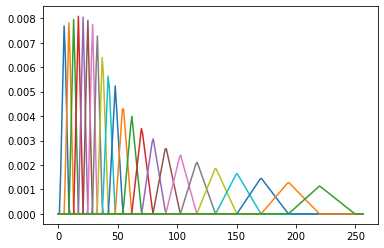

In [16]:
# Load Mel filters
mel_filters = np.load('mel_filters.npy')
# Filterbanks plot:
plt.plot(mel_filters.T)

In [17]:
print(np.shape(mel_filters))

(23, 257)


In [2]:
# Window lenght or frame length times the number of samples per second (sample rate) gives us 
# L number of samples to use for each kth frame, therefore we can get L as follows:

L = 0.025
L = int(L * file[0])

# Frame shift or hop times the number of samples per second (sample rate) gives us
# S samples that will form our k rows, therefore we can get S as follows:

S = 0.010
S = int(S * file[0])

# Number of DFT points
N = 512

NameError: name 'file' is not defined

In [20]:
# Computing the Fourier transform, magnitude spectrum and power spectrum:
# n = 512 by default which is the number of DFT points N we want to compute
def compute_fft(matrix, n):
    # number of frames
    # TODO: confirm
    m = len(matrix)
    dft = np.zeros(m, dtype = complex)
    dft_mag = np.zeros(m, dtype = complex)
    dft_pow = np.zeros(m, dtype = complex)

    for i in range(m):
        aux = scipy.fft.fft(matrix[i], n)
        print(len(aux))
        exit()
        dft_mag[i] = np.abs(dft[i])
        dft_pow[i] = np.square(dft_mag[i])
        # Computing magnitude spectrum:
    return dft, dft_mag, dft_pow

In [1]:
print(len(data_w_pre))
print(L)
print(S)
frame_matrix = computing_frames(data_w_pre, L, S)
print("Number of rows i.e. N_f or k frames: ", len(frame_matrix)) # ex: 112 = (samples - (L - 1))/K
print("Number of frames in each kth element: ", len(frame_matrix[0])) # ex: 400 = L
window_matrix = hamming_window(frame_matrix)
dft, dft_mag, dft_pow = compute_fft(window_matrix, N)

NameError: name 'data_w_pre' is not defined